In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy

import matplotlib.pyplot as plt
from pathlib import Path
from read_data import get_network_df, get_corrs, get_full_df
from numba.core import types
import graph_tool
import numba

from numba import njit
from graph_tool.topology import shortest_distance
import pandas as pd
import networkx as nx
import graph_tool as gt
from graph_tool.topology import shortest_distance
import numpy as np
import typing

import numba
from numba.core import types

from transport_problem import OptimParams, DualOracle, HyperParams
from subgd import OracleStacker, ustm_mincost_mcf

In [14]:
# SMALL GRAPH:
# net_df = get_network_df(Path('SiouxFalls') / 'SiouxFalls_net.tntp')
# corrs = get_corrs(Path('SiouxFalls') / 'SiouxFalls_trips.tntp')
# people_count = corrs.sum()
# corrs = corrs / people_count
# net_df.capacity /= people_count
# graph = graph_tool.Graph(net_df.values, eprops=[('capacity', 'double'), ('fft', 'double')])

#BERLING GRAPH
BIG_CONST_FOR_FAKE_EDGES = 400
net_df = get_network_df(Path('SiouxFalls') / 'berlin-center_net.tntp')
corrs = get_corrs(Path('SiouxFalls') / 'berlin-center_trips.tntp')
net_df.loc[net_df.free_flow_time < 1e-6, "free_flow_time"] = BIG_CONST_FOR_FAKE_EDGES
people_count = corrs.sum()
corrs = corrs / people_count
net_df.capacity /= people_count
net_df = net_df.rename({"free_flow_time":"fft"}, axis=1)
graph = graph_tool.Graph(net_df.values, eprops=[('capacity', 'double'), ('fft', 'double')])

In [23]:
from transport_problem import HyperParams, DualOracle, OptimParams 
l = np.sum(corrs, axis=1)
w = np.sum(corrs, axis=0)

zones_num = len(l)

COUNT_SOURCES_AND_TARGETS = corrs.shape[0] 
sources = np.arange(COUNT_SOURCES_AND_TARGETS)
targets = np.arange(COUNT_SOURCES_AND_TARGETS)

In [25]:
params = HyperParams(gamma=10, mu_pow=0.25, rho=0.15)
oracle = DualOracle(graph, l, w, params)
oracle_stacker = OracleStacker(oracle, graph, sources, targets)

In [ ]:
results = ustm_mincost_mcf(oracle_stacker,  eps_abs=1e-4, eps_cons_abs=1e-6, max_iter=100, stop_by_crit=False)

1
1
1
vars block grad:  37582.36043086729
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  0.0
mu in optim params norm:  0.0
grad dF dla:  0.029545006569510025
grad dF dmu:  0.02969489251312408
start optimizing
start init y is below t_bar count:  0
start init u is below t_bar count:  0
start init t is below t_bar count:  0


  0%|          | 0/100 [00:00<?, ?it/s]

vars block grad:  37582.36043086729
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  0.0
mu in optim params norm:  0.0
grad dF dla:  0.029545006569510025
grad dF dmu:  0.02969489251312408
count values below t_bar in old t:  1520
count values below t_bar in new t:  0
vars block grad:  37582.36176127865
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  0.0
mu in optim params norm:  0.0


  1%|          | 1/100 [00:04<07:15,  4.40s/it]

grad dF dla:  0.027847104056455706
grad dF dmu:  0.027997358935996385
norm (t - y):  10.0
norm t:  37582.36043086729
norm la:  7.05315436021667
norm mu:  7.0889359970983365

#######################################teta:  1.0
vars block grad:  37582.36176127865
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  7.05315436021667
mu in optim params norm:  7.0889359970983365
grad dF dla:  0.027847104056455706
grad dF dmu:  0.027997358935996385
count values below t_bar in old t:  1683
count values below t_bar in new t:  0
vars block grad:  37582.37150693497
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  7.05315436021667
mu in optim params norm:  7.088935997098336


  2%|▏         | 2/100 [00:08<07:12,  4.42s/it]

grad dF dla:  0.024224857295749632
grad dF dmu:  0.02437908370037219
norm (t - y):  18.853673704981034
norm t:  37582.36043086729
norm la:  20.348739420088442
norm mu:  20.456257292040874

#######################################teta:  0.7320508075688773
vars block grad:  37582.37509534453
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  20.348739420088442
mu in optim params norm:  20.456257292040874
grad dF dla:  0.02330580431098244
grad dF dmu:  0.02346188594230648
count values below t_bar in old t:  3079
count values below t_bar in new t:  0
vars block grad:  37582.41623041455
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  23.41395786946923
mu in optim params norm:  23.538014570359714


  3%|▎         | 3/100 [00:13<07:07,  4.41s/it]

grad dF dla:  0.016104973291015966
grad dF dmu:  0.01628952758438654
norm (t - y):  31.57858249796783
norm t:  37582.36043086729
norm la:  45.65735875310825
norm mu:  45.93001305738408

#######################################teta:  0.6298562413874016
vars block grad:  37582.43924992596
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  45.65735875310825
mu in optim params norm:  45.93001305738408
grad dF dla:  0.013660574972638997
grad dF dmu:  0.013864422897785477
count values below t_bar in old t:  3079
count values below t_bar in new t:  0
vars block grad:  37582.524405598706
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  54.26150484834947
mu in optim params norm:  54.59036405776006


  4%|▍         | 4/100 [00:17<07:02,  4.40s/it]

grad dF dla:  0.008226547520843066
grad dF dmu:  0.008398841733925834
norm (t - y):  37.17179133936615
norm t:  37582.36043086729
norm la:  78.14734446225944
norm mu:  78.85514794068142

#######################################teta:  0.5783829781709008
vars block grad:  37582.58511459168
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  78.14734446225944
mu in optim params norm:  78.85514794068142
grad dF dla:  0.007940894239895512
grad dF dmu:  0.008041515558496116
count values below t_bar in old t:  3291
count values below t_bar in new t:  0
vars block grad:  37582.65990166729
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  91.44850197744167
mu in optim params norm:  92.33369588319346
grad dF dla:  0.030578084634125924
grad dF dmu:  0.030538120367895806
norm (t - y):  43.16732642281719
norm t:  37582.36043086729
norm la:  105.28030040893663
norm mu:  106.89147354725536

vars block grad:  37582.571651124024
t i

  5%|▌         | 5/100 [00:26<09:27,  5.98s/it]

grad dF dla:  0.00761198133688082
grad dF dmu:  0.007602127044004764
norm (t - y):  21.114175362198722
norm t:  37582.36043086729
norm la:  96.03608347902392
norm mu:  97.25428795846372

#######################################teta:  0.4348195546038234
vars block grad:  37582.67143532078
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  96.03608347902392
mu in optim params norm:  97.25428795846372
grad dF dla:  0.01530419726070459
grad dF dmu:  0.015239824825292934
count values below t_bar in old t:  3082
count values below t_bar in new t:  0
vars block grad:  37582.7866219568
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  107.35099265750111
mu in optim params norm:  108.86883866721855
grad dF dla:  0.016642311892812445
grad dF dmu:  0.01686935759549776
norm (t - y):  82.49573041473384
norm t:  37582.36043086729
norm la:  125.78722831848592
norm mu:  127.32748763615264

vars block grad:  37582.6563375923
t in o

  6%|▌         | 6/100 [00:43<15:28,  9.88s/it]

grad dF dla:  0.004680460136278463
grad dF dmu:  0.004670267669901117
norm (t - y):  6.8320221360191375
norm t:  37582.36043086729
norm la:  102.22227761262691
norm mu:  103.620667336421

#######################################teta:  0.19505703795515067
vars block grad:  37582.678674974406
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  102.22227761262691
mu in optim params norm:  103.620667336421
grad dF dla:  0.005165815029707167
grad dF dmu:  0.005155154762263187
count values below t_bar in old t:  6045
count values below t_bar in new t:  0
vars block grad:  37582.694169552335
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  108.57607226583623
mu in optim params norm:  110.14566395513836


  7%|▋         | 7/100 [00:48<12:31,  8.08s/it]

grad dF dla:  0.0035020471452078053
grad dF dmu:  0.003541199352521209
norm (t - y):  6.9689127912647715
norm t:  37582.36043086729
norm la:  111.14550496793402
norm mu:  112.83688762589259

#######################################teta:  0.24041655425300265
vars block grad:  37582.74645085217
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  111.14550496793402
mu in optim params norm:  112.83688762589259
grad dF dla:  0.003311800119281433
grad dF dmu:  0.0034172802032116983
count values below t_bar in old t:  7518
count values below t_bar in new t:  0
vars block grad:  37582.76345265974
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  119.47534169650345
mu in optim params norm:  121.41200990300197


  8%|▊         | 8/100 [00:52<10:34,  6.90s/it]

grad dF dla:  0.0031242888828462213
grad dF dmu:  0.003045577312311
norm (t - y):  9.088314529350312
norm t:  37582.36043086729
norm la:  121.92751879171458
norm mu:  124.20492389043801

#######################################teta:  0.28707825456566666
vars block grad:  37582.82923109206
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  121.92751879171458
mu in optim params norm:  124.20492389043801
grad dF dla:  0.003443628182126655
grad dF dmu:  0.0032904445377281793
count values below t_bar in old t:  7518
count values below t_bar in new t:  0
vars block grad:  37582.87007748437
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  131.36213936899523
mu in optim params norm:  134.0949147009768
grad dF dla:  0.008260864511408204
grad dF dmu:  0.008546520037701151
norm (t - y):  18.192585240382808
norm t:  37582.36043086729
norm la:  136.92952706180972
norm mu:  139.84995555749256

vars block grad:  37582.8120350793

  9%|▉         | 9/100 [01:01<11:19,  7.46s/it]

grad dF dla:  0.0031727825621307598
grad dF dmu:  0.0033709725599393274
norm (t - y):  8.777877967343857
norm t:  37582.36043086729
norm la:  131.7953172238126
norm mu:  134.54761448109358

#######################################teta:  0.2488136198574119
vars block grad:  37582.90231695703
t in optim params grad:  37582.36043086729 37582.36043086729
la in optim params norm:  131.7953172238126
mu in optim params norm:  134.54761448109358


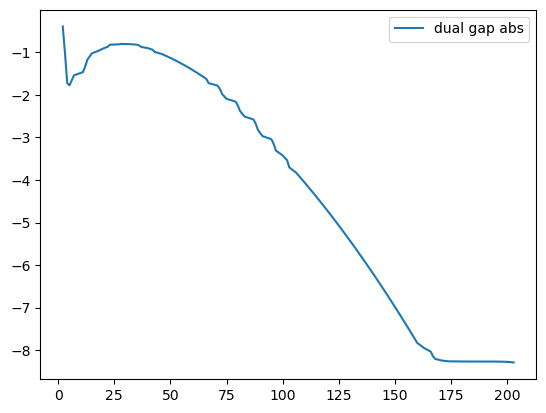

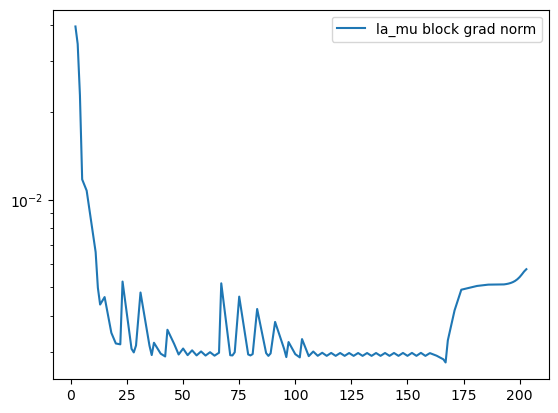

In [11]:
plt.rcParams['figure.dpi']=100
x = results.history_count_calls

plt.plot(x, results.history_dual_gap,  label="dual gap abs")
plt.savefig("plot_ustm_dual_gap.png")
# plt.yscale("log")
plt.legend()
plt.show()

plt.plot(x, results.history_la_mu_grad_norm, label="la_mu block grad norm")
plt.savefig("plot_ustm_la_mu_grad_norm.png")
plt.yscale("log")
plt.legend()
plt.show()


# plt.plot(x, results.history_prime_values, label="history prime function")
# plt.legend()
# plt.show()

# plt.plot(x, results.history_dual_values, label="history dual function")
# plt.legend()
# plt.show()



In [ ]:
# расчет прямой функции
vars = np.zeros(oracle_stacker.parameters_vector_size)  # dual costs w
_ = oracle_stacker(vars)
print("prime function value: ", oracle_stacker.get_prime_value())